In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df=pd.read_csv("C:/Users/draya/Desktop/New_Folder/Sales_Data_with_Missing_Values(2).csv")

In [9]:
df.describe()

,Quantity Sold,Price per Unit,Discount Applied
count,452.000000,447.000000,401.000000
mean,49.566372,250.944698,23.173641
std,28.573436,138.836578,14.010524
min,1.000000,10.600000,0.020000
25%,24.000000,131.585000,11.070000
50%,48.000000,254.430000,22.480000
75%,74.000000,368.365000,33.580000
max,100.000000,498.120000,49.870000


In [15]:
df.shape

(500, 6)

In [19]:
df.isnull().sum()

Date                 0
Product              0
Quantity Sold       48
Price per Unit      53
Customer Region     53
Discount Applied    99
dtype: int64

In [21]:
df.head()

,Date,Product,Quantity Sold,Price per Unit,Customer Region,Discount Applied
0,2023-01-22,Product B,16.0,444.86,NaN,0.08
1,2023-02-08,Product A,76.0,244.32,South,1.13
2,2023-06-09,Product B,NaN,307.21,South,9.33
3,2023-07-20,Product C,25.0,94.44,East,34.08
4,2023-02-13,Product D,NaN,60.05,South,44.79


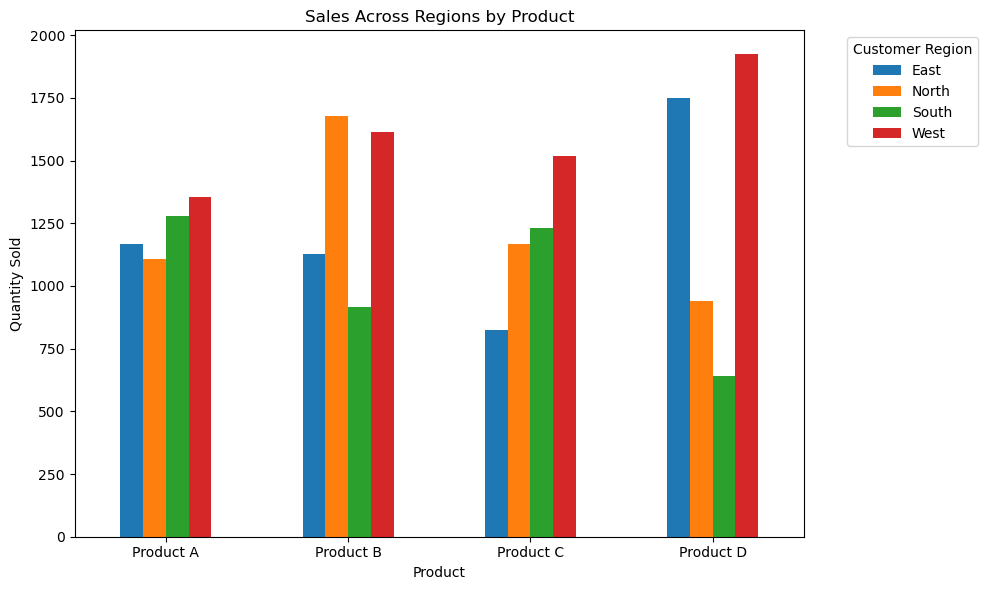

In [26]:
sales_summary = df.groupby(['Customer Region', 'Product'])['Quantity Sold'].sum().reset_index()

# Step 2: Handle Missing Values (if any in 'Quantity Sold')
# Replace NaN values with 0 (optional, as groupby should handle it, but good practice)
sales_summary['Quantity Sold'] = sales_summary['Quantity Sold'].fillna(0)

# Step 3: Pivot the data for plotting
pivot_data = sales_summary.pivot(index='Product', columns='Customer Region', values='Quantity Sold')

# Step 4: Plot the Bar Chart
pivot_data.plot(kind='bar', figsize=(10, 6), stacked=False)

# Chart Customization
plt.title('Sales Across Regions by Product')
plt.ylabel('Quantity Sold')
plt.xlabel('Product')
plt.xticks(rotation=0)
plt.legend(title='Customer Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

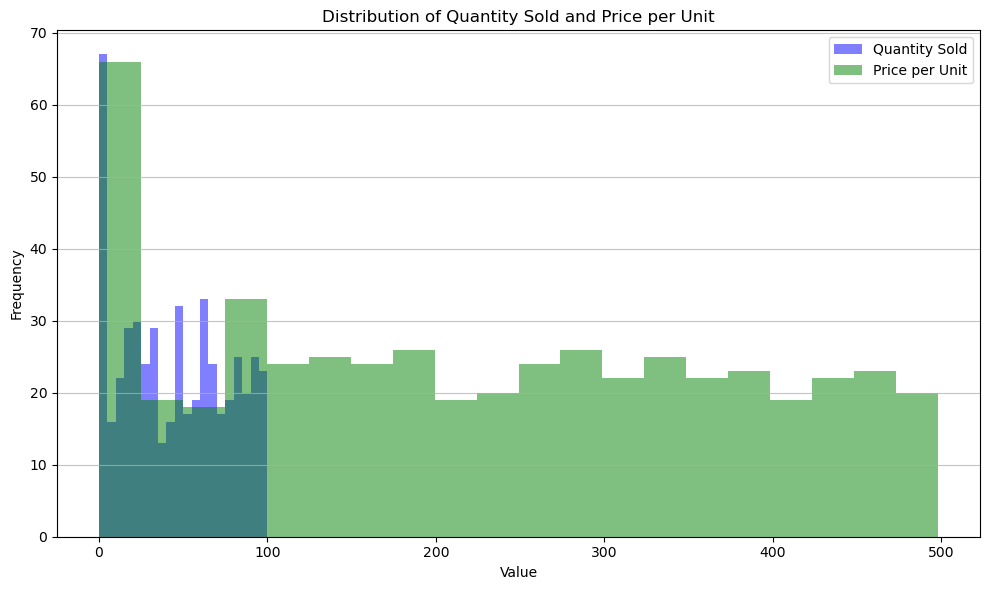

In [30]:
# Handle missing values for 'Quantity Sold' and 'Price per Unit'
df['Quantity Sold'] = df['Quantity Sold'].fillna(0)
df['Price per Unit'] = df['Price per Unit'].fillna(0)

# Step 1: Plot Histograms
plt.figure(figsize=(10, 6))

# Histogram for 'Quantity Sold'
plt.hist(df['Quantity Sold'], bins=20, alpha=0.5, label='Quantity Sold', color='blue')

# Histogram for 'Price per Unit'
plt.hist(df['Price per Unit'], bins=20, alpha=0.5, label='Price per Unit', color='green')

# Step 2: Customize the plot
plt.title('Distribution of Quantity Sold and Price per Unit')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Step 3: Show the plot
plt.show()

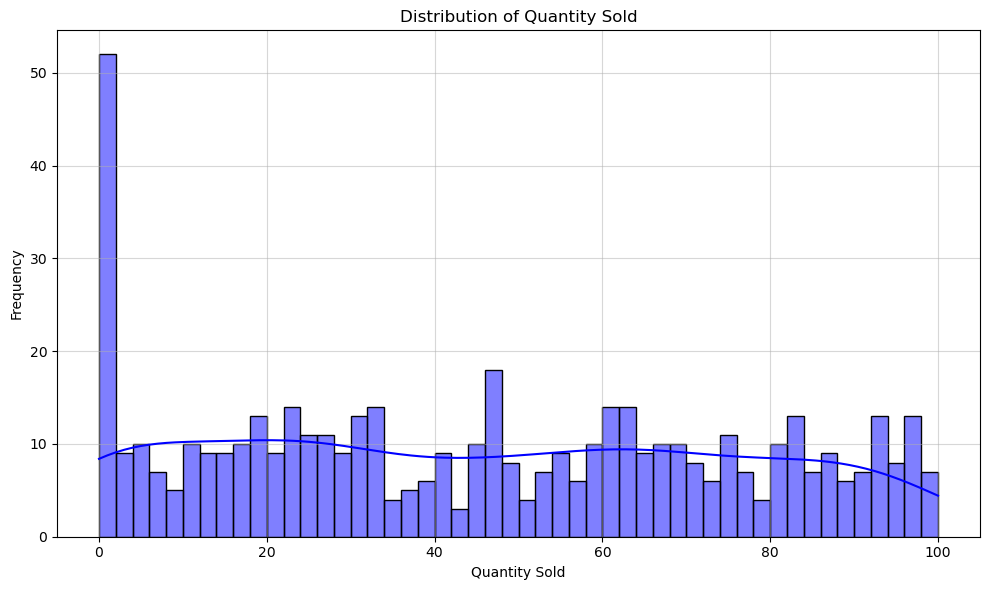

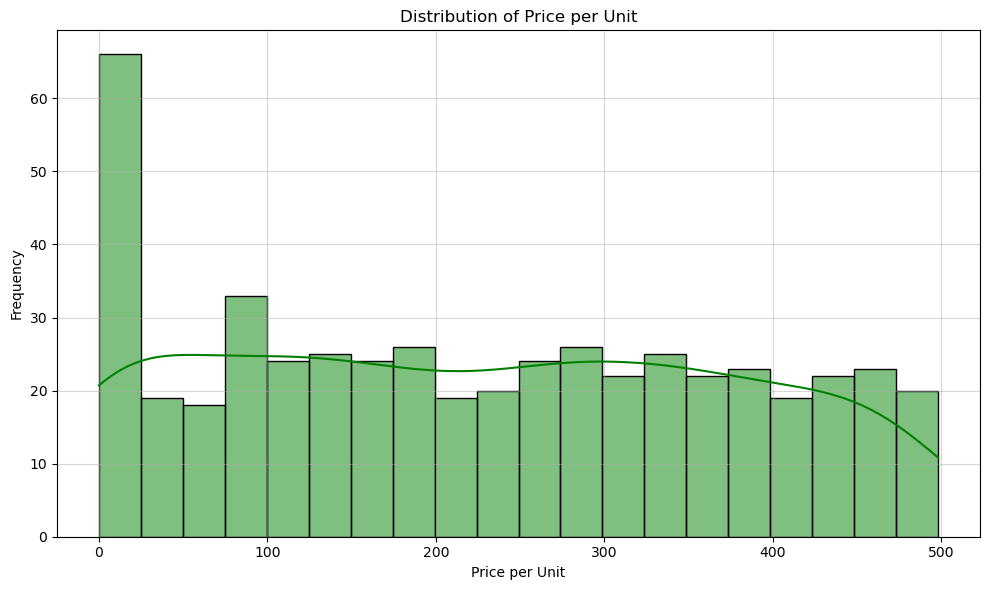

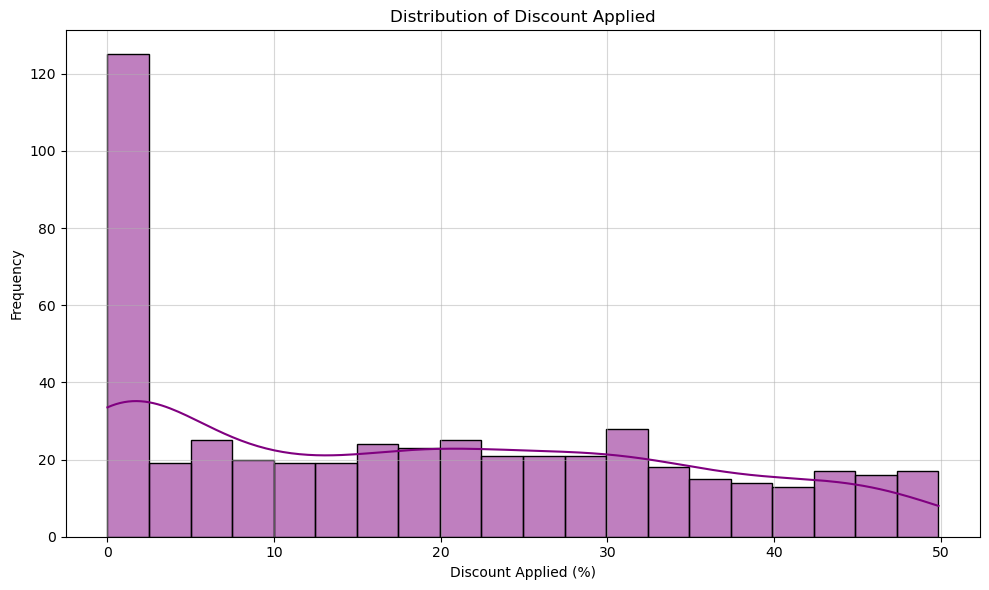

In [36]:
# Handle missing values before visualization
df['Quantity Sold'] = df['Quantity Sold'].fillna(0)
df['Price per Unit'] = df['Price per Unit'].fillna(0)
df['Discount Applied'] = df['Discount Applied'].fillna(0)

# Step 1: Plot Distribution for 'Quantity Sold'
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity Sold'], kde=True, bins=50, color='blue')
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Step 2: Plot Distribution for 'Price per Unit'
plt.figure(figsize=(10, 6))
sns.histplot(df['Price per Unit'], kde=True, bins=20, color='green')
plt.title('Distribution of Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Step 3: Plot Distribution for 'Discount Applied'
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount Applied'], kde=True, bins=20, color='purple')
plt.title('Distribution of Discount Applied')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Frequency')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

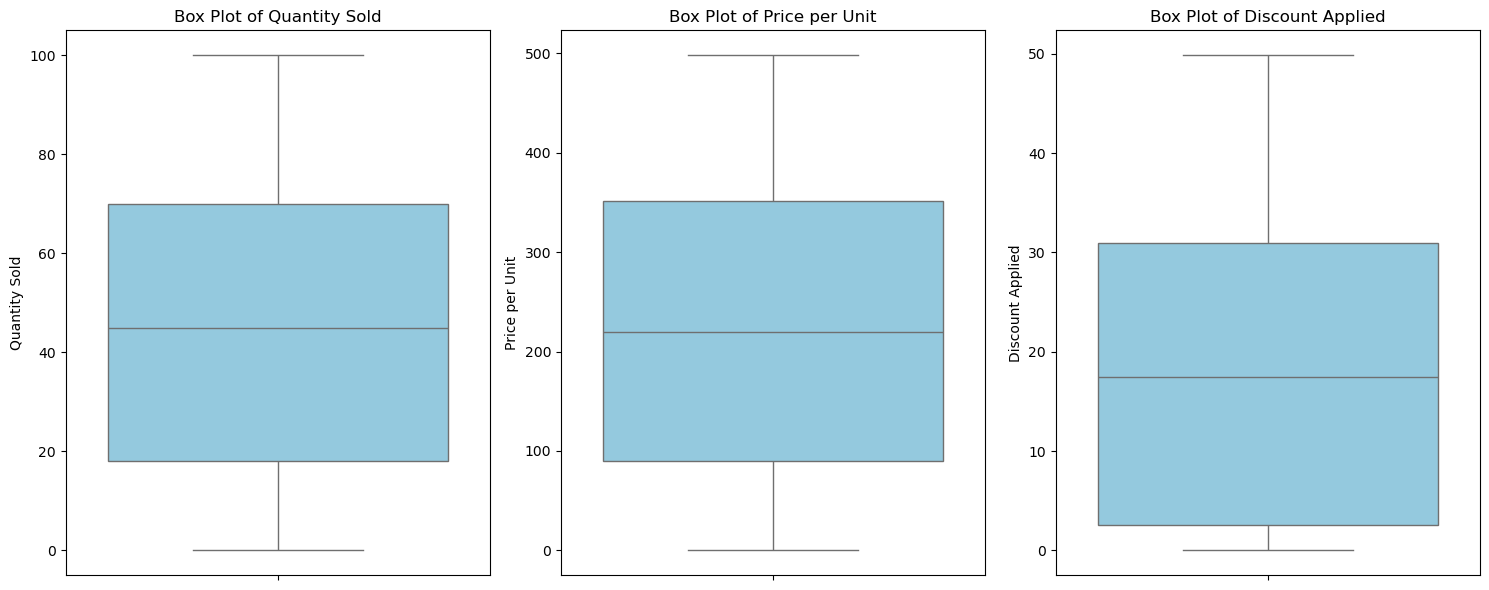

Quantity Sold - Outliers detected:
Lower bound: -60.0, Upper bound: 148.0
Total Outliers: 0

Price per Unit - Outliers detected:
Lower bound: -301.95500000000004, Upper bound: 742.9250000000001
Total Outliers: 0

Discount Applied - Outliers detected:
Lower bound: -40.07625, Upper bound: 73.61375
Total Outliers: 0



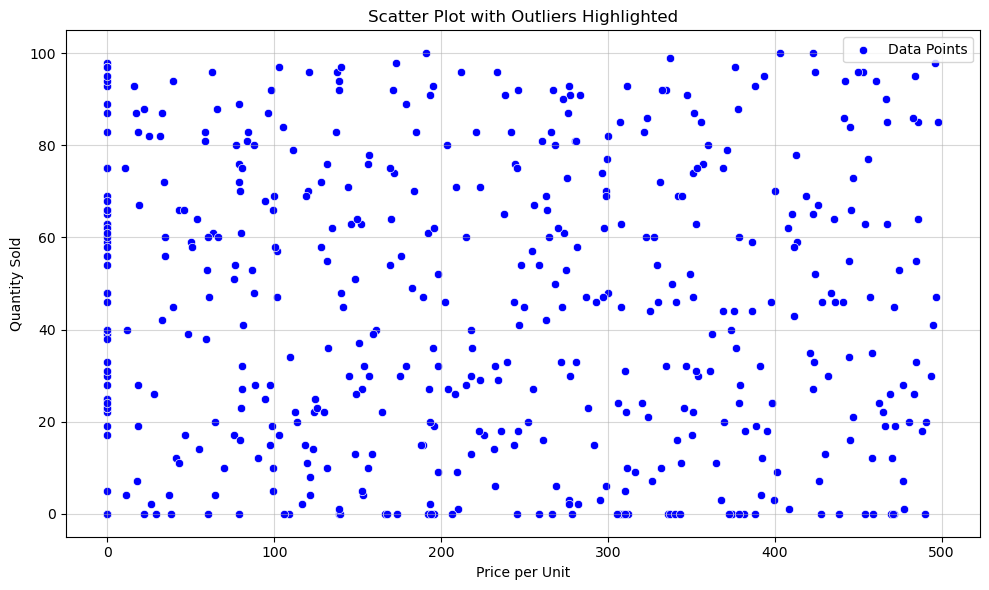

In [38]:
# Step 1: Box Plot for Visual Outlier Detection
numerical_columns = ['Quantity Sold', 'Price per Unit', 'Discount Applied']

plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Step 2: Outlier Detection using IQR
outlier_dict = {}  # Store outlier indices for each column

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_dict[col] = outliers.index.tolist()
    
    print(f'{col} - Outliers detected:')
    print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    print(f'Total Outliers: {len(outliers)}\n')

# Step 3: Highlight Outliers in Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Price per Unit'], y=df['Quantity Sold'], color='blue', label='Data Points')

for col, indices in outlier_dict.items():
    sns.scatterplot(x=df.loc[indices, 'Price per Unit'], 
                    y=df.loc[indices, 'Quantity Sold'], 
                    color='red', label=f'Outliers ({col})')

plt.title('Scatter Plot with Outliers Highlighted')
plt.xlabel('Price per Unit')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


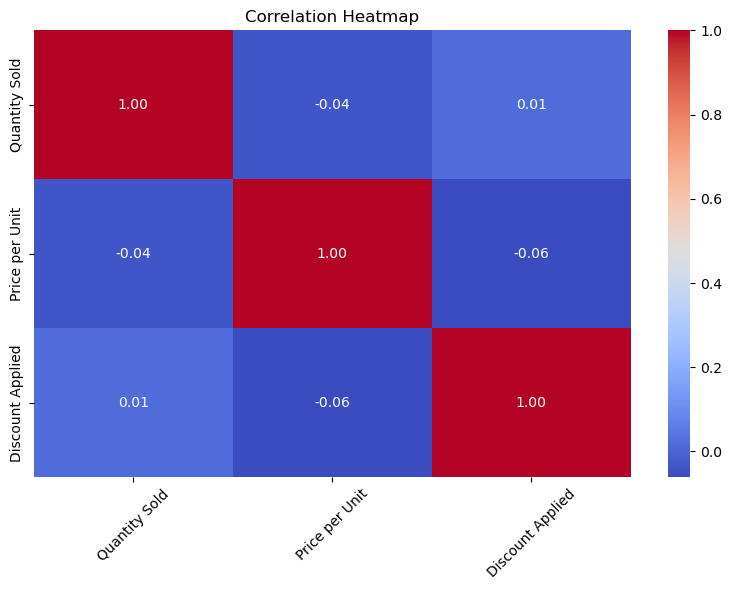

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the Correlation Matrix
correlation_matrix = df[['Quantity Sold', 'Price per Unit', 'Discount Applied']].corr()

# Step 2: Visualize the Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Customize the heatmap
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
# Step 1: Create Derived Features
df['Net Price'] = df['Price per Unit'] - df['Discount Applied']
df['Total Sales'] = df['Net Price'] * df['Quantity Sold']

# Step 2: Categorize Price per Unit
price_bins = [0, 50, 100, 200, df['Price per Unit'].max()]
price_labels = ['Low', 'Medium', 'High', 'Very High']
df['Price Category'] = pd.cut(df['Price per Unit'], bins=price_bins, labels=price_labels)

# Step 3: Extract Time-Based Features
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day of Week'] = pd.to_datetime(df['Date']).dt.dayofweek

# Preview the Dataset
print(df[['Date', 'Price per Unit', 'Discount Applied', 'Net Price', 'Total Sales', 'Price Category', 'Month', 'Day of Week']].head())


         Date  Price per Unit  Discount Applied  Net Price  Total Sales  \
0  2023-01-22          444.86              0.08     444.78      7116.48   
1  2023-02-08          244.32              1.13     243.19     18482.44   
2  2023-06-09          307.21              9.33     297.88         0.00   
3  2023-07-20           94.44             34.08      60.36      1509.00   
4  2023-02-13           60.05             44.79      15.26         0.00   

  Price Category  Month  Day of Week  
0      Very High      1            6  
1      Very High      2            2  
2      Very High      6            4  
3         Medium      7            3  
4         Medium      2            0  


In [52]:
# Step 1: Identifying Missing Data
missing_data = df.isnull().sum()
print("Missing Data per Column:")
print(missing_data)

# Step 2: Imputing Missing Values

# For Numerical Features: Impute with Mean or Median (depending on distribution)
df['Price per Unit'].fillna(df['Price per Unit'].mean(), inplace=True)
df['Quantity Sold'].fillna(df['Quantity Sold'].median(), inplace=True)

# For Categorical Features: Impute with Mode or 'Unknown'
df['Product'].fillna(df['Product'].mode()[0], inplace=True)
df['Customer Region'].fillna('Unknown', inplace=True)

# Step 3: Verifying No Missing Data
missing_data_after = df.isnull().sum()
print("\nMissing Data After Imputation:")
print(missing_data_after)

# Preview the Dataset
print("\nDataset After Handling Missing Values:")
print(df.head())


Missing Data per Column:
Date                 0
Product              0
Quantity Sold        0
Price per Unit       0
Customer Region     53
Discount Applied     0
Net Price            0
Total Sales          0
Price Category      53
Month                0
Day of Week          0
dtype: int64

Missing Data After Imputation:
Date                 0
Product              0
Quantity Sold        0
Price per Unit       0
Customer Region      0
Discount Applied     0
Net Price            0
Total Sales          0
Price Category      53
Month                0
Day of Week          0
dtype: int64

Dataset After Handling Missing Values:
         Date    Product  Quantity Sold  Price per Unit Customer Region  \
0  2023-01-22  Product B           16.0          444.86         Unknown   
1  2023-02-08  Product A           76.0          244.32           South   
2  2023-06-09  Product B            0.0          307.21           South   
3  2023-07-20  Product C           25.0           94.44            East

In [128]:
missing_data_after = df.isnull().sum()
print("\nMissing Data After Imputation:")
print(missing_data_after)



Missing Data After Imputation:
Date                0
Product             0
Quantity Sold       0
Price per Unit      0
Customer Region     0
Discount Applied    0
Net Price           0
Total Sales         0
Price Category      0
Month               0
Day of Week         0
dtype: int64


In [130]:
df.head()

,Date,Product,Quantity Sold,Price per Unit,Customer Region,Discount Applied,Net Price,Total Sales,Price Category,Month,Day of Week
0,2023-01-22,Product B,16.0,444.86,Unknown,0.08,444.78,7116.48,Very High,1,6
1,2023-02-08,Product A,76.0,244.32,South,1.13,243.19,18482.44,Very High,2,2
2,2023-06-09,Product B,0.0,307.21,South,9.33,297.88,0.00,Very High,6,4
3,2023-07-20,Product C,25.0,94.44,East,34.08,60.36,1509.00,Medium,7,3
4,2023-02-13,Product D,0.0,60.05,South,44.79,15.26,0.00,Medium,2,0


In [131]:
# Check for missing values in 'Price Category' column
missing_price_category = df['Price Category'].isnull().sum()
print(f"Missing values in 'Price Category': {missing_price_category}")

# Impute missing values in 'Price Category' with the mode (most frequent category)
df['Price Category'].fillna(df['Price Category'].mode()[0], inplace=True)

# Verify that there are no more missing values
missing_price_category_after = df['Price Category'].isnull().sum()
print(f"\nMissing values in 'Price Category' after imputation: {missing_price_category_after}")

# Preview the dataset
print("\nDataset After Handling Missing Values in 'Price Category':")
print(df.head())


Missing values in 'Price Category': 0

Missing values in 'Price Category' after imputation: 0

Dataset After Handling Missing Values in 'Price Category':
        Date    Product  Quantity Sold  Price per Unit Customer Region  \
0 2023-01-22  Product B           16.0          444.86         Unknown   
1 2023-02-08  Product A           76.0          244.32           South   
2 2023-06-09  Product B            0.0          307.21           South   
3 2023-07-20  Product C           25.0           94.44            East   
4 2023-02-13  Product D            0.0           60.05           South   

   Discount Applied  Net Price  Total Sales Price Category  Month  Day of Week  
0              0.08     444.78      7116.48      Very High      1            6  
1              1.13     243.19     18482.44      Very High      2            2  
2              9.33     297.88         0.00      Very High      6            4  
3             34.08      60.36      1509.00         Medium      7            

In [134]:
df.isnull().sum()

Date                0
Product             0
Quantity Sold       0
Price per Unit      0
Customer Region     0
Discount Applied    0
Net Price           0
Total Sales         0
Price Category      0
Month               0
Day of Week         0
dtype: int64

In [135]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Verify the conversion
print(df['Date'].head())


0   2023-01-22
1   2023-02-08
2   2023-06-09
3   2023-07-20
4   2023-02-13
Name: Date, dtype: datetime64[ns]


In [136]:
df.head(50)

,Date,Product,Quantity Sold,Price per Unit,Customer Region,Discount Applied,Net Price,Total Sales,Price Category,Month,Day of Week
0,2023-01-22,Product B,16.0,444.86,Unknown,0.08,444.78,7116.48,Very High,1,6
1,2023-02-08,Product A,76.0,244.32,South,1.13,243.19,18482.44,Very High,2,2
2,2023-06-09,Product B,0.0,307.21,South,9.33,297.88,0.00,Very High,6,4
3,2023-07-20,Product C,25.0,94.44,East,34.08,60.36,1509.00,Medium,7,3
4,2023-02-13,Product D,0.0,60.05,South,44.79,15.26,0.00,Medium,2,0
5,2023-10-26,Product C,26.0,469.09,West,18.70,450.39,11710.14,Very High,10,3
6,2023-12-13,Product A,19.0,18.20,West,8.41,9.79,186.01,Low,12,2
7,2023-04-26,Product C,33.0,423.35,South,0.00,423.35,13970.55,Very High,4,2
8,2023-04-18,Product A,40.0,373.88,South,0.88,373.00,14920.00,Very High,4,1
9,2023-07-10,Product C,47.0,351.20,Unknown,0.00,351.20,16506.40,Very High,7,0


In [137]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Price Category'
df_encoded['Price Category'] = label_encoder.fit_transform(df_encoded['Price Category'])

# Display the first few rows to check the changes
print(df_encoded[['Price Category']].head())


   Price Category
0               3
1               3
2               3
3               2
4               2


In [143]:
# Apply label encoding to 'Customer Region'
df_encoded['Customer Region'] = label_encoder.fit_transform(df_encoded['Customer Region'])

# Display the first few rows to check the changes
print(df_encoded[['Customer Region']].head())


   Customer Region
0                3
1                2
2                2
3                0
4                2


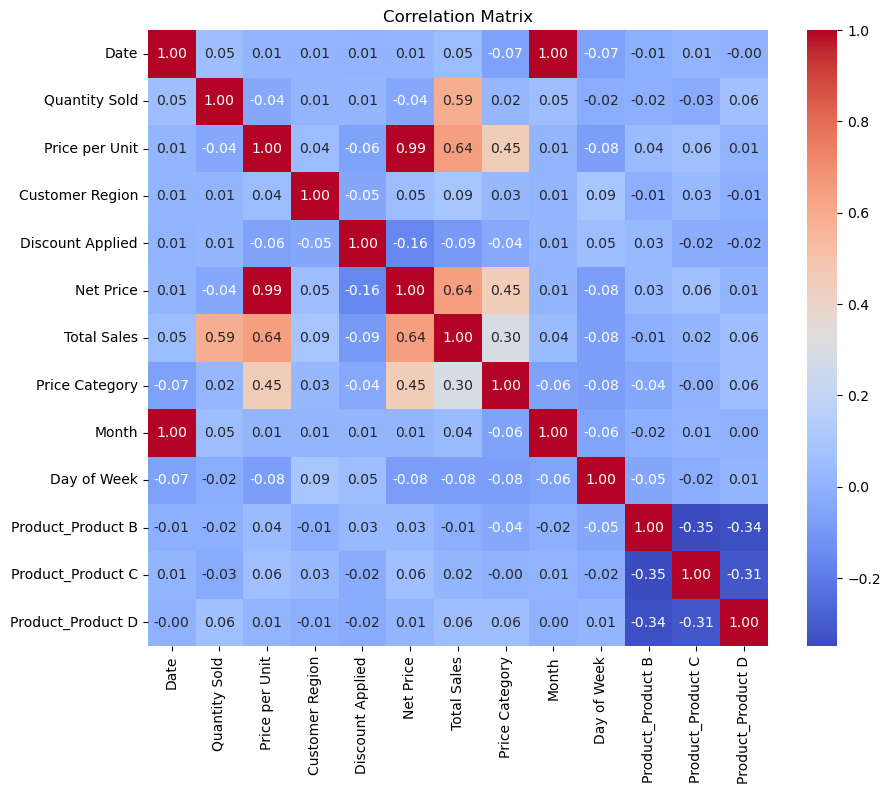

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [145]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Prepare your features (X) and target (y)
X = df_encoded.drop(['Quantity Sold', 'Date'], axis=1)  # Drop target and non-numeric columns
y = df_encoded['Quantity Sold']

# Apply RFE with a Linear Regression model
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_rfe = rfe.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")


Selected Features: Index(['Customer Region', 'Price Category', 'Month', 'Product_Product C',
       'Product_Product D'],
      dtype='object')


In [147]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df_encoded.drop(['Quantity Sold', 'Date'], axis=1)  # Drop target and non-numeric columns
y = df_encoded['Quantity Sold']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split datasets
print(f"Training Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")


Training Set Size: (400, 11)
Testing Set Size: (100, 11)


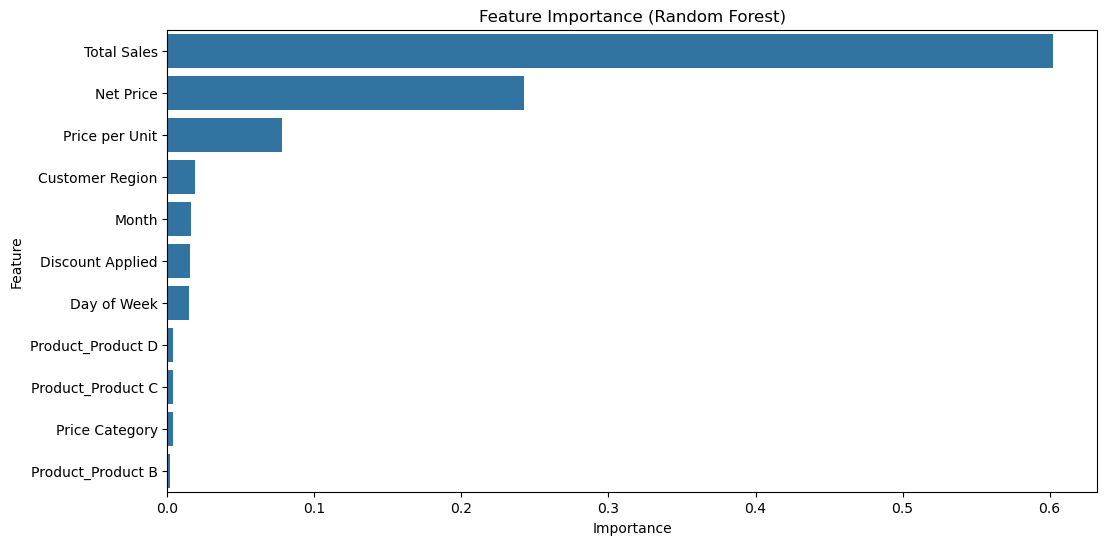

              Feature  Importance
4         Total Sales    0.602412
3           Net Price    0.242817
0      Price per Unit    0.077794
1     Customer Region    0.018543
6               Month    0.015977
2    Discount Applied    0.015347
7         Day of Week    0.014691
10  Product_Product D    0.003830
9   Product_Product C    0.003529
5      Price Category    0.003488
8   Product_Product B    0.001572


In [148]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()

print(importance_df)


In [149]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R²): {r2}")


Mean Absolute Error (MAE): 7.953199999999999
Mean Squared Error (MSE): 265.458148
R-Squared (R²): 0.7340843707514407


In [155]:
# Features (X) and Target (y)
X = df_encoded.drop(['Quantity Sold', 'Date'], axis=1)  # Drop target and non-numeric columns
y = df_encoded['Quantity Sold']  # Target is Quantity Sold


In [157]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split datasets
print(f"Training Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")


Training Set Size: (400, 11)
Testing Set Size: (100, 11)


In [159]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [161]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)


In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R²): {r2}")


Mean Absolute Error (MAE): 7.953199999999999
Mean Squared Error (MSE): 265.458148
R-Squared (R²): 0.7340843707514407


In [165]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_absolute_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with best parameters
best_model = grid_search.best_estimator_

# Make predictions with the tuned model
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the evaluation metrics for the tuned model
print(f"Mean Absolute Error (MAE) - Tuned: {mae_best}")
print(f"Mean Squared Error (MSE) - Tuned: {mse_best}")
print(f"R-Squared (R²) - Tuned: {r2_best}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Absolute Error (MAE) - Tuned: 7.9041999999999994
Mean Squared Error (MSE) - Tuned: 255.63297550000004
R-Squared (R²) - Tuned: 0.743926475608637
